# KNN Tips and Tricks

### Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Explore the dataset

In [21]:
wine = load_wine()

In [22]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Create a temp df to eyeball data

In [23]:
wine.target.shape

(178,)

In [25]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [24]:
wine.data.shape

(178, 13)

In [26]:
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)

In [27]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Create test/train sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Start with 5 neighbors (default)

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
knn.score(X_test, y_test)

0.6666666666666666

Create plots to look at distributions

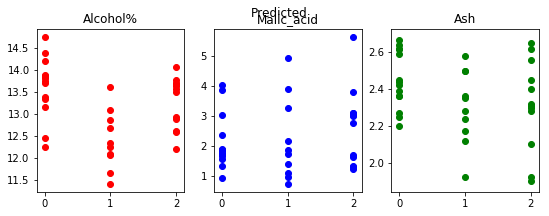

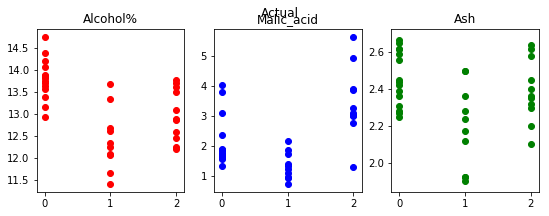

In [31]:
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.scatter(y_pred, X_test[:,0], c='r')
plt.title('Alcohol%')
plt.subplot(132)
plt.scatter(y_pred, X_test[:,1], c='b')
plt.title('Malic_acid')
plt.subplot(133)
plt.scatter(y_pred, X_test[:,2], c='g')
plt.title('Ash')
plt.suptitle('Predicted')

plt.figure(2, figsize=(9, 3))

plt.subplot(131)
plt.scatter(y_test, X_test[:,0], c='r')
plt.title('Alcohol%')
plt.subplot(132)
plt.scatter(y_test, X_test[:,1], c='b')
plt.title('Malic_acid')
plt.subplot(133)
plt.scatter(y_test, X_test[:,2], c='g')
plt.title('Ash')
plt.suptitle('Actual')

plt.show()

Increase to 20 neighbors

In [32]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
knn.score(X_test, y_test)

0.6111111111111112

Whoops, back it up and make it odd.

In [34]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [35]:
knn.score(X_test, y_test)

0.7222222222222222

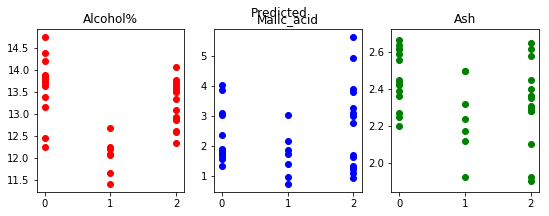

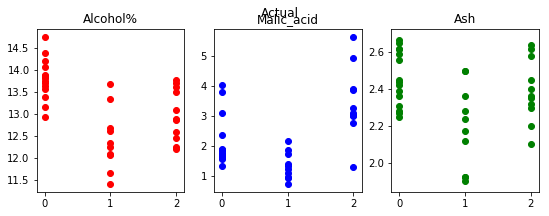

In [36]:
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.scatter(y_pred, X_test[:,0], c='r')
plt.title('Alcohol%')
plt.subplot(132)
plt.scatter(y_pred, X_test[:,1], c='b')
plt.title('Malic_acid')
plt.subplot(133)
plt.scatter(y_pred, X_test[:,2], c='g')
plt.title('Ash')
plt.suptitle('Predicted')

plt.figure(2, figsize=(9, 3))

plt.subplot(131)
plt.scatter(y_test, X_test[:,0], c='r')
plt.title('Alcohol%')
plt.subplot(132)
plt.scatter(y_test, X_test[:,1], c='b')
plt.title('Malic_acid')
plt.subplot(133)
plt.scatter(y_test, X_test[:,2], c='g')
plt.title('Ash')
plt.suptitle('Actual')

plt.show()

Scores and plots appear to reflect the model predicting classifications more accurately!

## Let's try rescaling (blatantly stolen from Michael)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_scaled = pd.DataFrame(scaler.transform(X_train), columns = wine.feature_names)

In [39]:
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.694325,0.752648,1.223607,1.118528,-0.154274,-1.233258,-1.527144,1.103420,-1.905011,-0.259658,-0.312756,-0.796883,-0.682090
1,-1.410271,-0.790360,-1.307607,0.312431,-0.893466,-0.527978,-0.430021,-0.501966,-0.178754,-1.262734,-0.056438,1.059834,-0.759415
2,-0.209413,0.298822,0.391427,0.670696,0.853714,-1.348071,-0.673826,-0.983582,-0.654355,2.436109,-2.064262,-1.659452,-0.805810
3,0.112466,-0.626983,0.634147,-0.523522,-0.087075,0.242909,0.413138,-0.582235,-0.337288,-0.301453,0.669796,-0.138991,1.127306
4,-0.828412,0.444046,-0.510101,-0.523522,-0.759068,0.242909,0.230284,-0.903312,0.631530,-1.179144,0.797955,1.015974,-1.393477


In [40]:
X_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,1.007332e-14,-3.877962e-16,-3.474529e-15,-1.438599e-16,-2.314268e-16,5.504204e-16,8.381402e-16,-3.877962e-16,1.813886e-16,1.876433e-16,3.340051e-15,1.294739e-15,7.505733e-17
std,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00
min,-2.388289e+00,-1.316798e+00,-3.492079e+00,-2.732825e+00,-1.968654e+00,-2.168164e+00,-1.709998e+00,-1.866544e+00,-2.134004e+00,-1.542759e+00,-2.064262e+00,-1.951849e+00,-1.430593e+00
25%,-7.603224e-01,-6.632887e-01,-5.707808e-01,-6.727988e-01,-7.590675e-01,-8.355130e-01,-8.236650e-01,-8.029756e-01,-5.794919e-01,-8.029906e-01,-7.719924e-01,-9.248064e-01,-7.594151e-01
50%,6.294608e-02,-4.454523e-01,-2.466261e-02,-7.568987e-02,-1.542743e-01,5.428784e-02,1.337780e-01,-1.808886e-01,-1.171017e-01,-1.760681e-01,5.036107e-02,2.557438e-01,-2.490725e-01
75%,7.624148e-01,7.049959e-01,6.601522e-01,5.438107e-01,5.177181e-01,8.169743e-01,7.763061e-01,7.020737e-01,5.963005e-01,5.030980e-01,6.697962e-01,7.528176e-01,6.842360e-01
max,2.316102e+00,3.139771e+00,2.991990e+00,3.059132e+00,4.213677e+00,2.539170e+00,3.105153e+00,2.387729e+00,3.432294e+00,3.355596e+00,3.190256e+00,1.922403e+00,2.905773e+00


In [41]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_scaled, y_train)
y_pred_scaled = knn.predict(X_scaled)

In [42]:
knn.score(X_test, y_test)

0.4166666666666667

Hmmm...I'm likely not using this correctly but the score is discouraging so...let's move on.

## Adding weights

In [43]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
y_pred_weighted = knn.predict(X_test)

In [44]:
knn.score(X_test, y_test)

0.8333333333333334

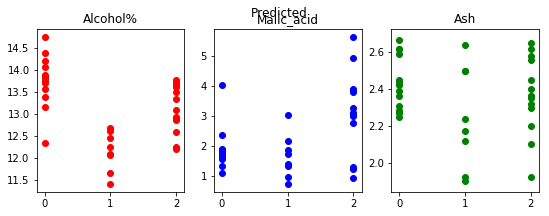

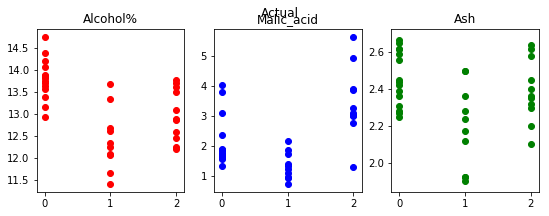

In [45]:
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.scatter(y_pred_weighted, X_test[:,0], c='r')
plt.title('Alcohol%')
plt.subplot(132)
plt.scatter(y_pred_weighted, X_test[:,1], c='b')
plt.title('Malic_acid')
plt.subplot(133)
plt.scatter(y_pred_weighted, X_test[:,2], c='g')
plt.title('Ash')
plt.suptitle('Predicted')

plt.figure(2, figsize=(9, 3))

plt.subplot(131)
plt.scatter(y_test, X_test[:,0], c='r')
plt.title('Alcohol%')
plt.subplot(132)
plt.scatter(y_test, X_test[:,1], c='b')
plt.title('Malic_acid')
plt.subplot(133)
plt.scatter(y_test, X_test[:,2], c='g')
plt.title('Ash')
plt.suptitle('Actual')

plt.show()

Using this small of a neighborhood seems like we're likely overfitting but we can explore that later

In [ ]:
#### Play with algorithm arguments to KNN here (variety of distance measurements)

In [49]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', leaf_size=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [50]:
knn.score(X_test, y_test)

0.8055555555555556

In [51]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', leaf_size=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [52]:
knn.score(X_test, y_test)

0.8055555555555556

In [53]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [54]:
knn.score(X_test, y_test)

0.8055555555555556